/var/folders/lv/st0pk19j1nl0vj5ry67mxbtw0000gn/T/ipykernel_37002/3660201273.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/lv/st0pk19j1nl0vj5ry67mxbtw0000gn/T/ipykernel_37002/3660201273.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


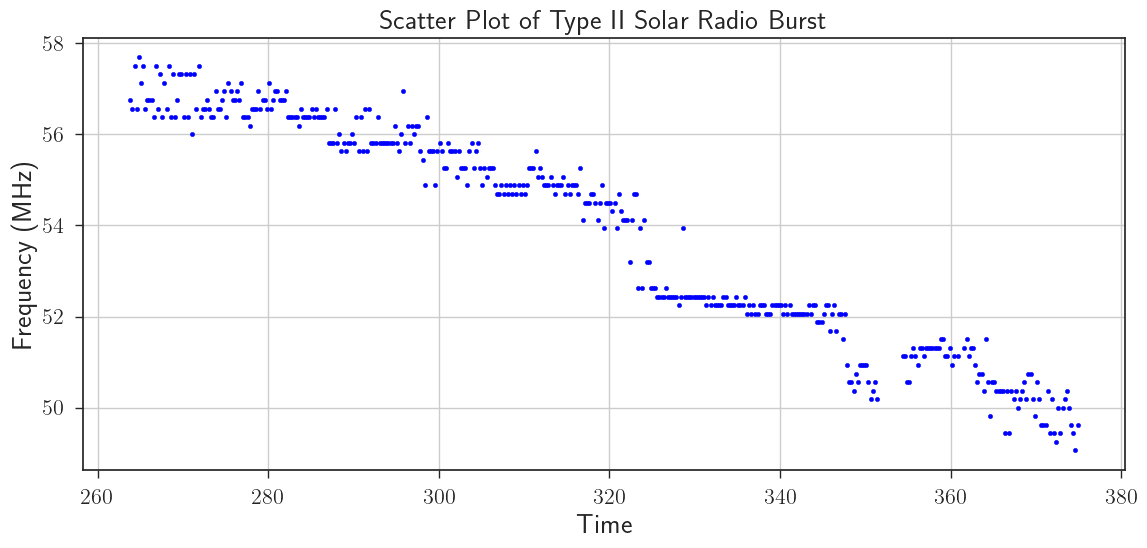

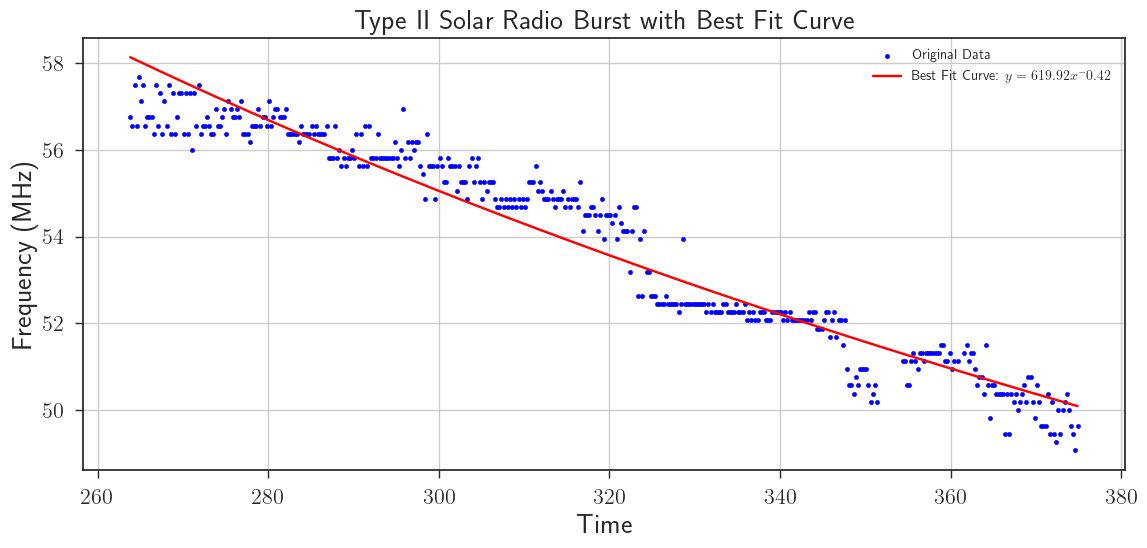

0.9345343322491382 0.6065731311247091


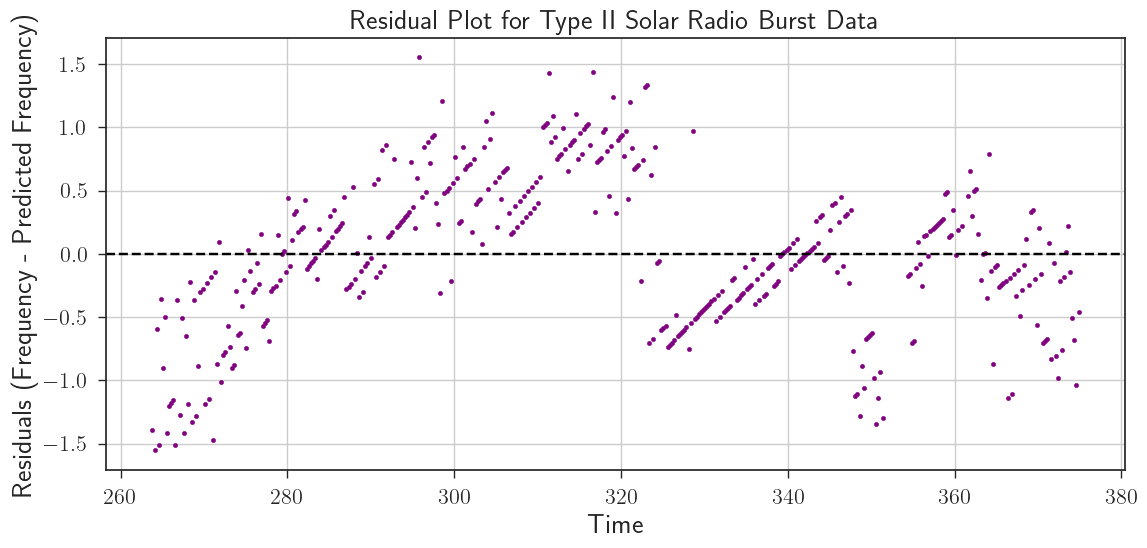

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn')
plt.style.use('seaborn-ticks')
plt.rcParams['font.size'] = '24'
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = '30'
plt.rcParams['xtick.labelsize'] = '16'
plt.rcParams['ytick.labelsize'] = '16'  
plt.rcParams['axes.labelsize'] = '20'
plt.rcParams['axes.titlesize'] = '20'
plt.rcParams['figure.edgecolor'] ="black"
plt.rcParams['errorbar.capsize'] =10
plt.rcParams['figure.autolayout']=True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})

# Load the data from the provided CSV file
file_path = '/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Data CSV/Fundemental Frequencies/'
#file_path = '/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Data CSV/Harmonic Frequencies/'
filename = 'Fundamental_SRI-Lanka_20230715_1014_1028.fit.gz.csv'
#filename = 'Harmonic_GREENLAND_20220302_1737_1758.fit.gz.csv'
data = pd.read_csv(file_path+filename)

# Display the first few rows of the dataset to understand its structure
data.head()


# Scatter plot of the data
plt.figure(figsize=(12, 6))
plt.scatter(data['time'], data['frequency'], color='blue', s=10)
plt.title('Scatter Plot of Type II Solar Radio Burst',fontweight='bold')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Frequency (MHz)',fontweight='bold')
plt.grid(True)
plt.show()


# Transforming the data
X_transformed = np.log(data['time'])
Y_transformed = np.log(data['frequency'])

# Reshaping the data for linear regression
X_transformed_reshaped = X_transformed.values.reshape(-1, 1)

# Performing linear regression on the transformed data
linear_model = LinearRegression()
linear_model.fit(X_transformed_reshaped, Y_transformed)

# Retrieving the parameters A and B
A = linear_model.intercept_
B = linear_model.coef_[0]

# Converting A and B back to a and b in the original model
a = np.exp(A)
b = B

# Print the model parameters
a, b


# Plotting the original data and the best fit curve
plt.figure(figsize=(12, 6))
plt.scatter(data['time'], data['frequency'], color='blue', s=10, label='Original Data')

# Generating points for the best fit curve
time_values = np.linspace(data['time'].min(), data['time'].max(), 400)
best_fit_curve = a * (time_values ** b)

# Plotting the best fit curve
plt.plot(time_values, best_fit_curve, color='red', label=r'Best Fit Curve: $y = {:.2f}x^{:.2f}$'.format(a, b))
plt.title('Type II Solar Radio Burst with Best Fit Curve',fontweight='bold')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Frequency (MHz)',fontweight='bold')
plt.legend()
plt.grid(True)
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Fitted Data/Best Fit/' + 'BF_' + filename + '.png')
plt.show()

# Calculating the predictions on the original scale for evaluation metrics
predicted_frequencies = a * (data['time'] ** b)

# Calculating R² (Coefficient of Determination)
r_squared = r2_score(data['frequency'], predicted_frequencies)

# Calculating RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(data['frequency'], predicted_frequencies))

r_squared, rmse

print(r_squared, rmse)


# Calculating residuals
residuals = data['frequency'] - predicted_frequencies

# Creating the residual plot
plt.figure(figsize=(12, 6))
plt.scatter(data['time'], residuals, color='purple', s=10)
plt.axhline(y=0, color='black', linestyle='--')  # Line at zero for reference
plt.title('Residual Plot for Type II Solar Radio Burst Data',fontweight='bold')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Residuals (Frequency - Predicted Frequency)',fontweight='bold')
plt.grid(True)
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Fitted Data/Residual/' + 'RES_' + filename + '.png')
plt.show()


In [2]:
# Calculating the frequency drift rate for each time point
frequency_drift = b * a * (data['time'] ** (b - 1))

# Converting the result to a numpy array
frequency_drift = np.array(frequency_drift)

In [3]:
# Calculating shock speed
shock_speed = (13853221.38 * np.abs(frequency_drift)) / (data['frequency'] * (np.log(data['frequency'] ** 2 / 3.385)) ** 2)

# Converting the result to a numpy array
shock_speed = np.array(shock_speed)


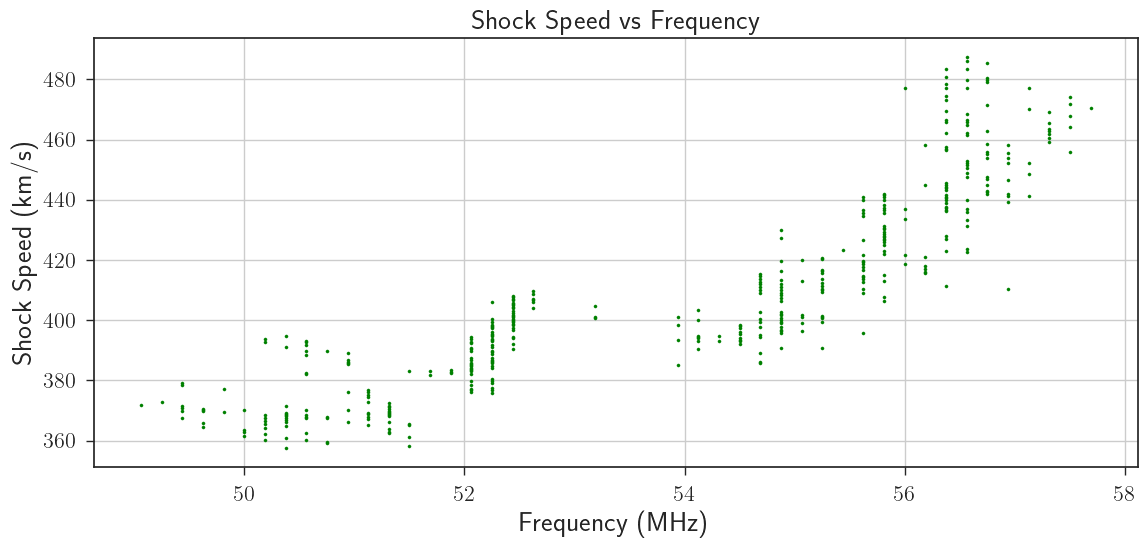

In [4]:
# Plotting shock_speed vs frequency
plt.figure(figsize=(12, 6))
plt.scatter(data['frequency'], shock_speed, color='green', s=5)
plt.title('Shock Speed vs Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Shock Speed (km/s)')
plt.grid(True)
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Fitted Data/Shock vs Freq/' + 'SvF_' + filename + '.png')
plt.show()


In [5]:
R_p = 4.32 * np.log(10) / np.log(data['frequency'] ** 2 / 3.385)

# Storing the result in a numpy array
R_p = np.array(R_p)

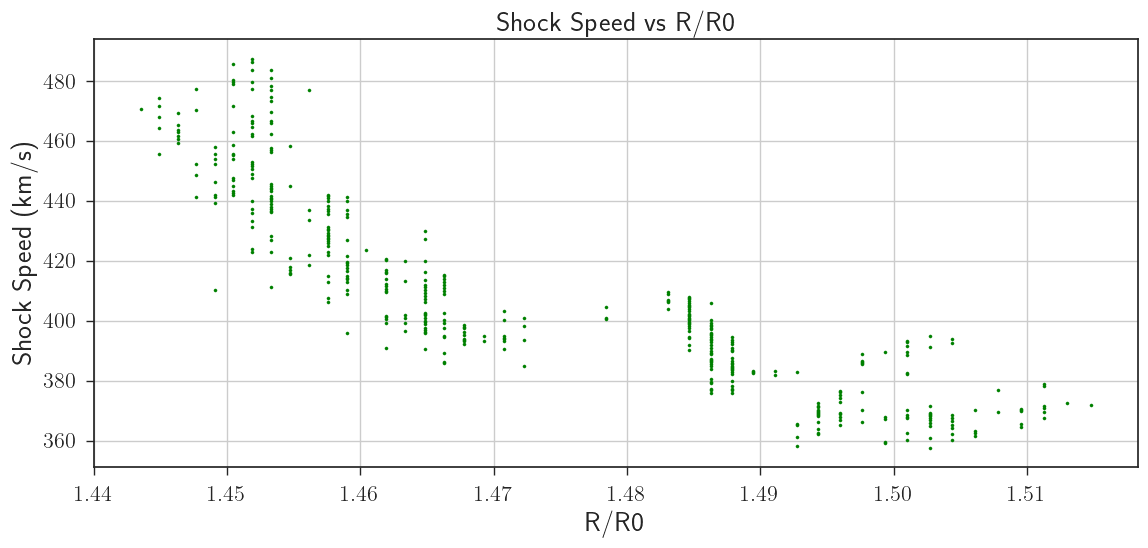

In [6]:
# Plotting shock_speed vs R/R0
plt.figure(figsize=(12, 6))
plt.scatter(R_p, shock_speed, color='green', s=5)
plt.title('Shock Speed vs R/R0')
plt.xlabel('R/R0')
plt.ylabel('Shock Speed (km/s)')
plt.grid(True)
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Fitted Data/Shock vs R/' + 'SvR_' + filename + '.png')
plt.show()

In [7]:
# Calculating shock speed when beta = 2
beta = 2

shock_speed = (13853221.38 * np.abs(frequency_drift)) / (data['frequency'] * (np.log(data['frequency'] ** 2 / (3.385*beta)) ** 2))

# Converting the result to a numpy array
shock_speed = np.array(shock_speed)

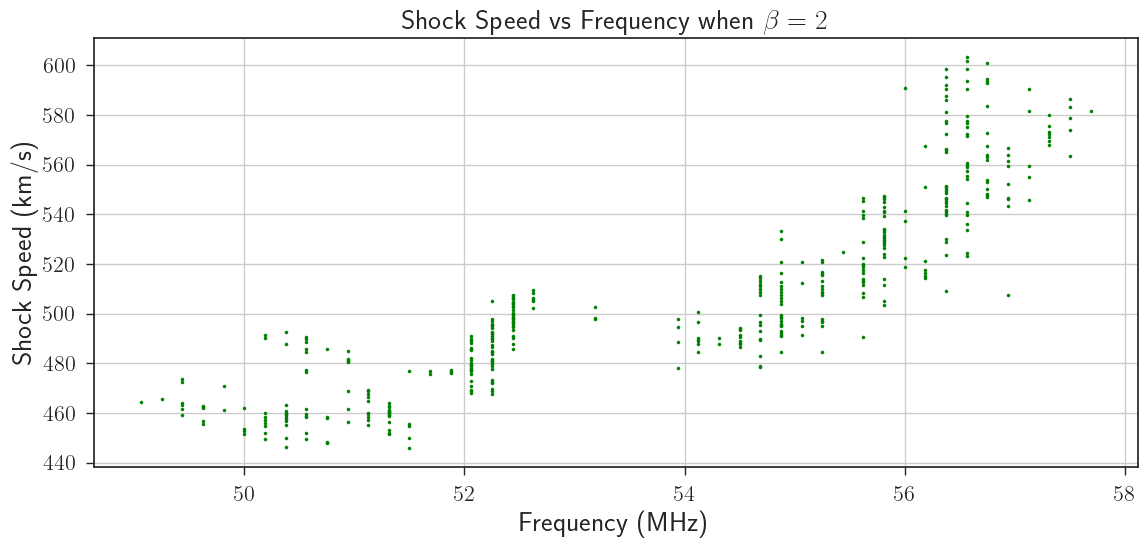

In [8]:
# Plotting shock_speed vs frequency
plt.figure(figsize=(12, 6))
plt.scatter(data['frequency'], shock_speed, color='green', s=5)
plt.title(r'Shock Speed vs Frequency when $\beta = 2$')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Shock Speed (km/s)')
plt.grid(True)
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Fitted Data/Shock vs Freq/' + 'SvF_' + filename + '.png')
plt.show()

In [9]:
R_p = 4.32 * np.log(10) / np.log(data['frequency'] ** 2 / (3.385*beta))

# Storing the result in a numpy array
R_p = np.array(R_p)

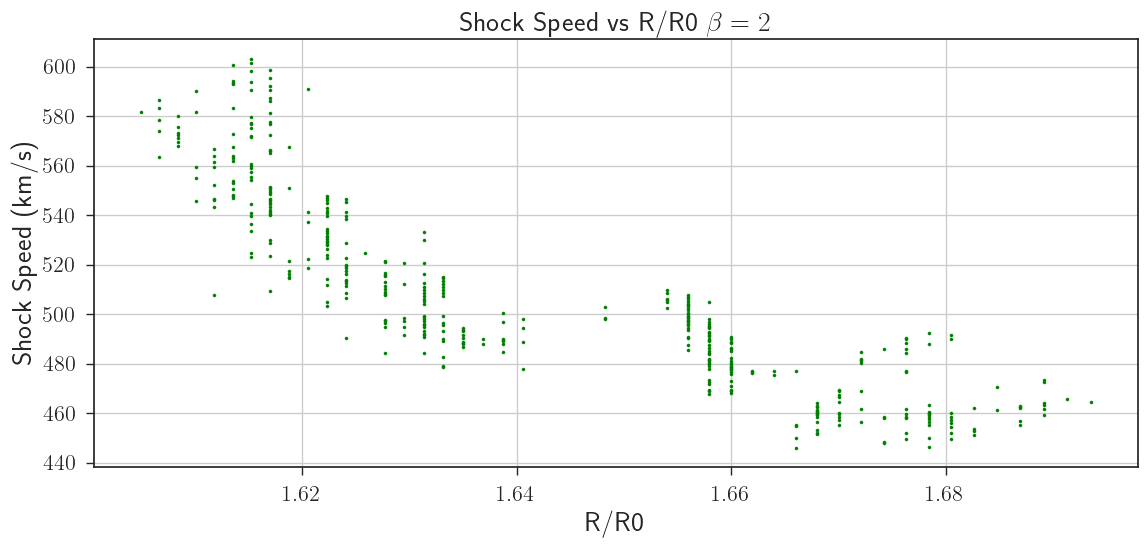

In [10]:
# Plotting shock_speed vs R/R0 when beta=2
plt.figure(figsize=(12, 6))
plt.scatter(R_p, shock_speed, color='green', s=5)
plt.title(r'Shock Speed vs R/R0 $\beta = 2$')
plt.xlabel('R/R0')
plt.ylabel('Shock Speed (km/s)')
plt.grid(True)
#plt.savefig('/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Images/Fitted Data/Shock vs R/' + 'SvR_' + filename + '.png')
plt.show()